<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [15]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

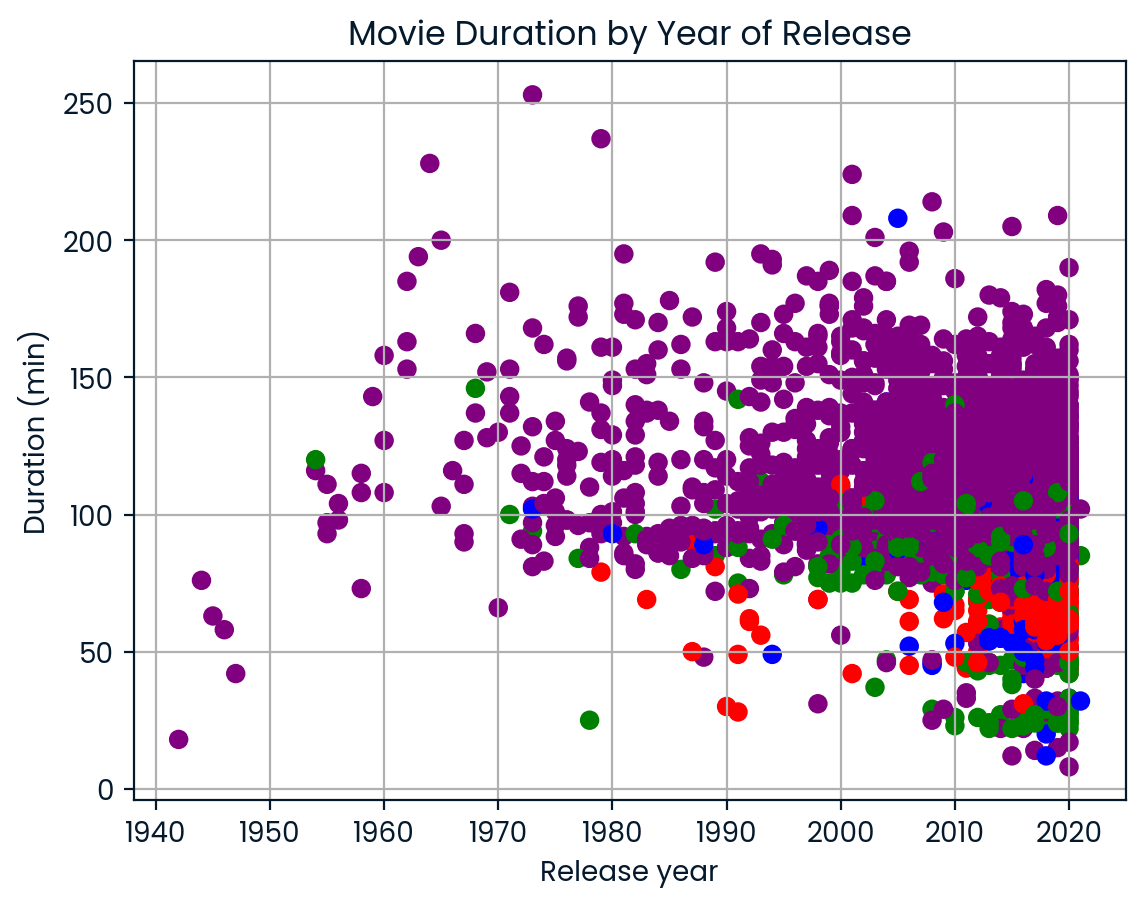

Most frequent movie duration in the 1990s: 94
Number of short action movies in the 1990s: 7


In [16]:
# Start coding here! Use as many cells as you like
netflix_subset = netflix_df[netflix_df['type'] != "TV Show"] # Filtering the data to remove TV shows and store as netflix_subset
netflix_movies = netflix_subset.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']] # Keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies
short_movies = netflix_movies[netflix_movies['duration'] < 60] # Filtering netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies

# Using a for loop and if/elif statements, iterating through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else)
colors = []
for lab, rows in netflix_movies.iterrows():
    if rows['genre'] == 'Children':
        colors.append('green')
    elif rows['genre'] == 'Documentaries':
        colors.append('blue')
    elif rows['genre'] == 'Stand-Up':
        colors.append('red')
    else:
        colors.append('purple')

# Initializing a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release"
fig = plt.figure()
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'],color = colors)
plt.title('Movie Duration by Year of Release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.grid(True)
plt.show()

# Filter for 1990s movies (1990–1999)
movies_90s = netflix_movies[
    (netflix_movies['release_year'] >= 1990) & 
    (netflix_movies['release_year'] <= 1999)
].dropna(subset=['duration', 'genre'])  # drop NaN to avoid errors

# Convert duration to integer if it's not already
movies_90s['duration'] = movies_90s['duration'].astype(int)

# Task 1: Find the most frequent duration
duration = int(movies_90s['duration'].mode()[0])

# Task 2: Count short action movies (< 90 minutes and "Action" in genre)
short_action_movies = movies_90s[
    (movies_90s['duration'] < 90) &
    (movies_90s['genre'].str.contains('Action', case=False))
]
short_movie_count = len(short_action_movies)

# Print results
print("Most frequent movie duration in the 1990s:", duration)
print("Number of short action movies in the 1990s:", short_movie_count)
